In [1]:
from initial_cleaning import initial_cleaning

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing

%matplotlib inline
sns.set_style('white')
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
fraud = pd.DataFrame(initial_cleaning('creditcard.csv'))

   Time     V1     V2    V3     V4     V5     V6     V7     V8     V9  ...    \
0 0.000 -1.360 -0.073 2.536  1.378 -0.338  0.462  0.240  0.099  0.364  ...     
1 0.000  1.192  0.266 0.166  0.448  0.060 -0.082 -0.079  0.085 -0.255  ...     
2 1.000 -1.358 -1.340 1.773  0.380 -0.503  1.800  0.791  0.248 -1.515  ...     
3 1.000 -0.966 -0.185 1.793 -0.863 -0.010  1.247  0.238  0.377 -1.387  ...     
4 2.000 -1.158  0.878 1.549  0.403 -0.407  0.096  0.593 -0.271  0.818  ...     

     V21    V22    V23    V24    V25    V26    V27    V28  Amount  Class  
0 -0.018  0.278 -0.110  0.067  0.129 -0.189  0.134 -0.021 149.620      0  
1 -0.226 -0.639  0.101 -0.340  0.167  0.126 -0.009  0.015   2.690      0  
2  0.248  0.772  0.909 -0.689 -0.328 -0.139 -0.055 -0.060 378.660      0  
3 -0.108  0.005 -0.190 -1.176  0.647 -0.222  0.063  0.061 123.500      0  
4 -0.009  0.798 -0.137  0.141 -0.206  0.502  0.219  0.215  69.990      0  

[5 rows x 31 columns]
Time      0
V1        0
V2        0
V3        

In [12]:
# Define the training and test sizes.
trainsize = int(fraud.shape[0] / 2)
fraud_test = fraud.iloc[trainsize:, :].copy()
fraud_train = fraud.iloc[:trainsize, :].copy()

# Set up the regression model to predict defaults using all other
# variables as features.
regr1 = linear_model.LinearRegression()
Y_train = fraud_train['Class'].values.reshape(-1, 1)
X_train = fraud_train.loc[:, ~(fraud_train.columns).isin(['Class'])]
regr1.fit(X_train, Y_train)
print('\nR-squared model:')
print(regr1.score(X_train, Y_train))

#Store the parameter estimates.
origparams = np.append(regr1.coef_, regr1.intercept_)




R-squared simple model:
0.4984356281


In [15]:
from sklearn.svm import SVC

# Instantiate our model and fit the data.
X = fraud
Y = fraud['Class']
svm = SVC(kernel = 'linear')
svm.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
# Visualize our model
y_min, y_max = X.Time.min() - 1, X.Time.max() + 3
x_min, x_max = X.Amount.min() - 1, X.Amount.max() + 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))

Z = (svm.predict(np.c_[xx.ravel(), yy.ravel()])=='Class')

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(fraud.Amount[0:10], fraud.Time[0:10], marker='x')
plt.scatter(fraud.Amount[10:20], fraud.Time[10:20], marker='o')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Amount')
plt.ylabel('Time')
plt.title('Credit Card Fraud')
plt.show()

Weak learner 0 R^2: 0.0
Weak learner 20 R^2: 1.0
Weak learner 40 R^2: 1.0
Weak learner 60 R^2: 1.0
Weak learner 80 R^2: 1.0
Weak learner 100 R^2: 1.0


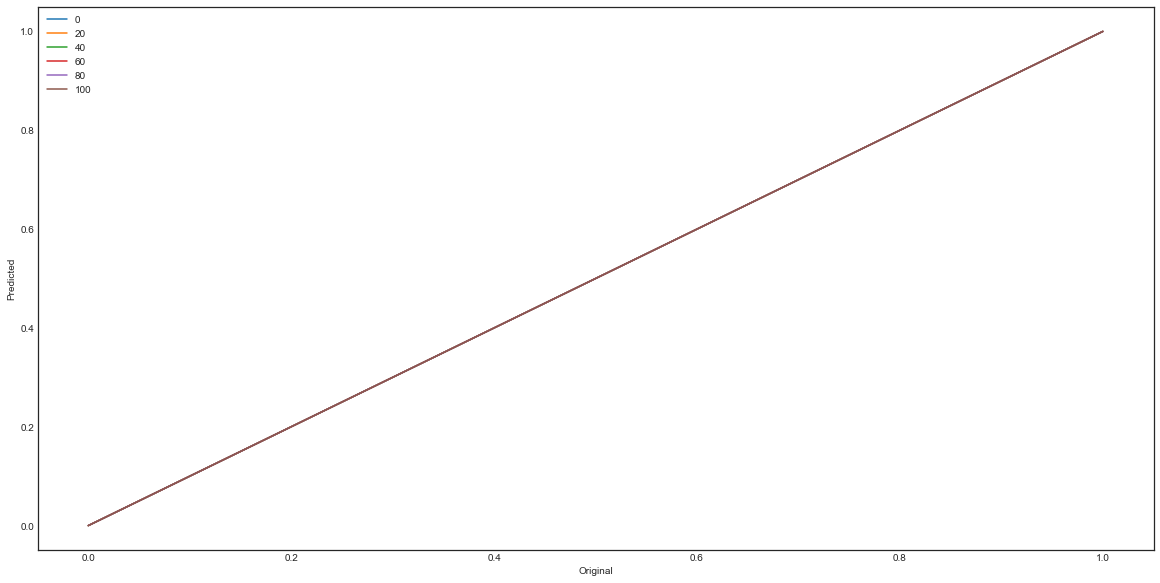

Overall R^2:
1.0


In [17]:
from sklearn import tree
from IPython.display import Image
import pydotplus

# Define outcome and predictors

y = fraud['Class']
X = fraud

# Store values from loops.
preds = pd.DataFrame()
labels = []

uniquex = fraud['Class'].unique()

# Iterate through decision trees, each time using the residuals
# from the previous tree as the inputs.
for m in range(0, 101):
    
    # Initialize and fit the tree. Set the max depth to 2.
    decision_tree = tree.DecisionTreeRegressor(max_depth=2)
    decision_tree.fit(X,y)
    
    # Get and store predicted values.
    pred = decision_tree.predict(X)
    preds['pred{}'.format(m)] = pred
    
    # Residuals.
    y = y - pred

    # Output every 20 iterations.
    if m % 20 == 0:
        print('Weak learner {} R^2: {}'.format(m, decision_tree.score(X, y)))
        labels = labels + [m]
        bestpred = preds.sum(axis=1)
        plt.plot(uniquex, np.poly1d(np.polyfit(fraud['Class'], bestpred, 1))(uniquex))
       
plt.legend(labels)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.show()
predicted = preds.sum(axis=1)

print('Overall R^2:')
print(np.corrcoef(fraud['Class'], predicted)[0, 1])

In [19]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = KNeighborsClassifier(n_neighbors=5)
X = fraud[['Amount', 'Time']]
Y = fraud['Class']
neighbors.fit(X,Y)

print(neighbors.predict([['Class']]).values.reshape(-1, 1))
print(neighbors.predict([['Class']]))

ValueError: could not convert string to float: 'Class'